<a href="https://colab.research.google.com/github/scottwmwork/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
# TODO - code!
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
    return (prob_positive_drunk * prob_drunk_prior)/prob_positive

In [0]:
import numpy as np
import random
from scipy import stats

def confidence_interval(data, confidence=.95):
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean , mean-interval, mean+interval)

In [0]:
#creating data
data = []
for  x in range(50):
  data.append(random.randint(1,100))

In [87]:
mean, var, std = stats.bayes_mvs(data, .05)
data_ci = confidence_interval(data)

print(mean)
print(var)
print(std)
print(data_ci)

Mean(statistic=51.14, minmax=(50.88540161634864, 51.39459838365136))
Variance(statistic=850.5536170212766, minmax=(816.6134487300133, 837.6895844572008))
Std_dev(statistic=29.00954686280957, minmax=(28.576449197372536, 28.94286759215819))
(51.14, 43.022524161609454, 59.25747583839055)


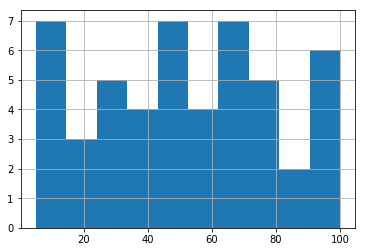

In [88]:

import pandas as pd

data_series = pd.Series(data)

data_series.hist();

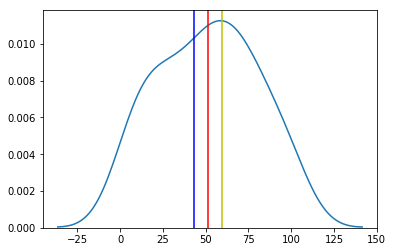

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(data)
plt.axvline(x = data_ci[0], color = 'r') #mean
plt.axvline(x = data_ci[1], color = 'b') #upper
plt.axvline(x = data_ci[2], color = 'y') #lower

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)